In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib as plt
import datetime

In [2]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,79,97,128,158,266,301,387,387,502,589


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2,3,3,4,4,4,6,8,9,13


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index=pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index=pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0)

In [20]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [21]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [22]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths, left_index=True, right_index=True, suffixes=('ConfirmedCases', 'DeathCases'))

In [23]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
2020-03-06,2,1,0,0
2020-03-07,8,6,0,0
2020-03-08,12,4,1,1
2020-03-09,12,0,1,0
2020-03-10,17,5,1,0


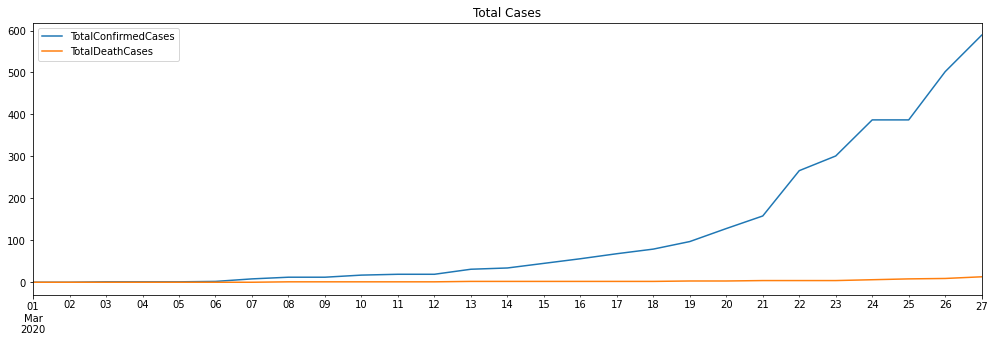

In [24]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

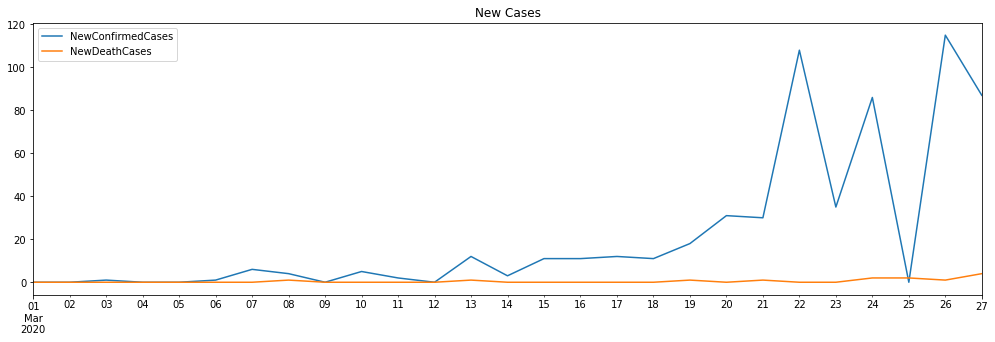

In [25]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [26]:
from pyramid.arima import auto_arima

In [27]:
predicted_days = 6
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [28]:
firstPredictionDay

Timestamp('2020-03-28 00:00:00')

In [29]:
confirmed_model = auto_arima(data_argentina.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=256.556, BIC=258.994, Fit time=0.021 seconds
Fit ARIMA: order=(1, 2, 0); AIC=235.724, BIC=239.381, Fit time=0.148 seconds
Fit ARIMA: order=(0, 2, 1); AIC=240.447, BIC=244.104, Fit time=0.132 seconds
Fit ARIMA: order=(2, 2, 0); AIC=237.654, BIC=242.530, Fit time=0.272 seconds
Fit ARIMA: order=(1, 2, 1); AIC=237.424, BIC=242.300, Fit time=0.332 seconds
Fit ARIMA: order=(2, 2, 1); AIC=239.397, BIC=245.491, Fit time=0.543 seconds
Total fit time: 1.527 seconds


In [30]:
confirmed_model.fit(data_argentina.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [31]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [32]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-28 - 704
2020-03-29 - 805
2020-03-30 - 925
2020-03-31 - 1037
2020-04-01 - 1162
2020-04-02 - 1285


In [33]:
deaths_model = auto_arima(data_argentina.TotalDeathCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=94.118, BIC=101.432, Fit time=1.480 seconds
Fit ARIMA: order=(0, 2, 0); AIC=71.013, BIC=73.451, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 0); AIC=66.554, BIC=70.210, Fit time=0.117 seconds
Fit ARIMA: order=(0, 2, 1); AIC=65.136, BIC=68.792, Fit time=0.143 seconds
Fit ARIMA: order=(1, 2, 1); AIC=65.911, BIC=70.786, Fit time=0.316 seconds
Fit ARIMA: order=(0, 2, 2); AIC=65.163, BIC=70.039, Fit time=0.223 seconds
Fit ARIMA: order=(1, 2, 2); AIC=88.769, BIC=94.863, Fit time=0.856 seconds
Total fit time: 3.180 seconds


In [34]:
deaths_model.fit(data_argentina.TotalDeathCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [35]:
deaths_forecast = deaths_model.predict(n_periods=predicted_days)

In [36]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(deaths_forecast[x])))

2020-03-28 - 15
2020-03-29 - 18
2020-03-30 - 20
2020-03-31 - 23
2020-04-01 - 26
2020-04-02 - 29
